# Project : Census Income

# Problem Statement:
    
    
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.

In [1]:
#import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset

In [57]:
df=pd.read_csv("C:/Users/hp/Downloads/census-income_final.csv",skipinitialspace= True)
df.head()

#with the skipinitial space it will give unnamed name to a empyt column name

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
df.rename(columns={"Unnamed: 14": "income"}, inplace=True) #first give an name to empty column then 
# use this code



In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
df.shape

(32561, 15)

In [58]:
df.duplicated().sum()

24

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
status=df[(df['relationship']=='Unmarried') & (df['hours-per-week']<20)]
status.count()

age               123
workclass         123
fnlwgt            123
education         123
education-num     123
marital-status    123
occupation        123
relationship      123
race              123
sex               123
capital-gain      123
capital-loss      123
hours-per-week    123
native-country    123
Unnamed: 14       123
dtype: int64

In [61]:
df['age'].min()

17

In [62]:
df['age'].max()

90

In [63]:
df['age'].median()

37.0

In [ ]:
df['']

In [64]:
import pandas as pd

# Assuming your dataset is in a DataFrame named df
# If not, you can load it from a CSV file or another data source
# df = pd.read_csv('your_dataset.csv')

# Group the data by "native-country" and calculate the population count for each country
population_by_country = df.groupby('native-country').size()

# Find the country with the highest population
highest_population_country = population_by_country.idxmax()

# Find the country with the lowest population
lowest_population_country = population_by_country.idxmin()

# Print the results
print("Country with the highest population:", highest_population_country)
print("Country with the lowest population:", lowest_population_country)


Country with the highest population: United-States
Country with the lowest population: Holand-Netherlands


In [33]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#Treating Null values 

In [34]:
df['native-country'].unique()  # we can see ? i.e. null values

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [36]:
df['native-country'].nunique()

42

In [37]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [38]:
df['occupation'].nunique()

15

In [40]:
df=df.replace("?",np.NaN)

In [41]:
df['native-country'].nunique() #question mark treated with NaN

41

In [42]:
df['native-country'].unique() 

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [43]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [44]:
df.isnull().sum().sum()

4262

In [ ]:
#if null values are lesser than 30 percent of the data then we can drop the null value

In [45]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum().sum()

0

In [48]:
df.shape

(30162, 15)

In [49]:
df.duplicated().sum()

23

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

In [53]:
import pandas as pd

# Assuming your dataset is in a DataFrame named df
# If not, you can load it from a CSV file or another data source
# df = pd.read_csv('your_dataset.csv')

# Filter the dataset for unmarried individuals (marital-status = "Never-married") and work fewer than 20 hours
unmarried_and_less_than_20_hours = df[(df['marital-status'] == 'Never-married') & (df['hours-per-week'] < 20)]

# Calculate the count of such individuals
count_unmarried_and_less_than_20_hours = len(unmarried_and_less_than_20_hours)

# Print the count
print("Number of samples: ", count_unmarried_and_less_than_20_hours)


Number of samples:  781


In [54]:
status=df[(df['marital-status']=='Never-married') & (df['hours-per-week']<20)]
status.count()

age               781
workclass         781
fnlwgt            781
education         781
education-num     781
marital-status    781
occupation        781
relationship      781
race              781
sex               781
capital-gain      781
capital-loss      781
hours-per-week    781
native-country    781
income            781
dtype: int64

In [ ]:
df[]

In [39]:
#check the outliers

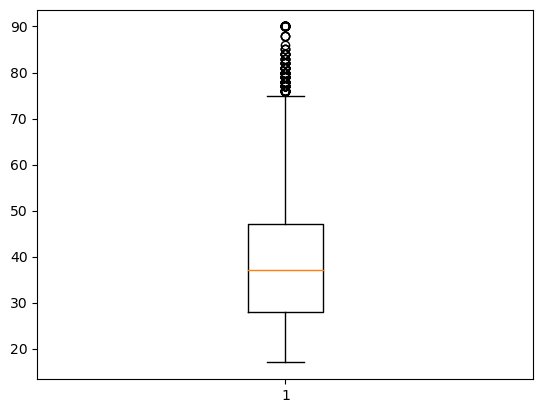

In [41]:
plt.boxplot(df['age'])
plt.show()

In [42]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

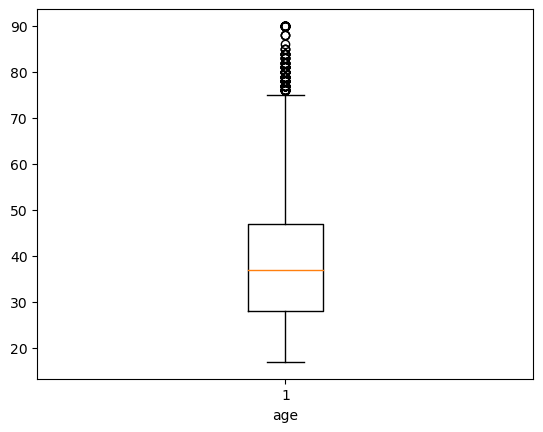

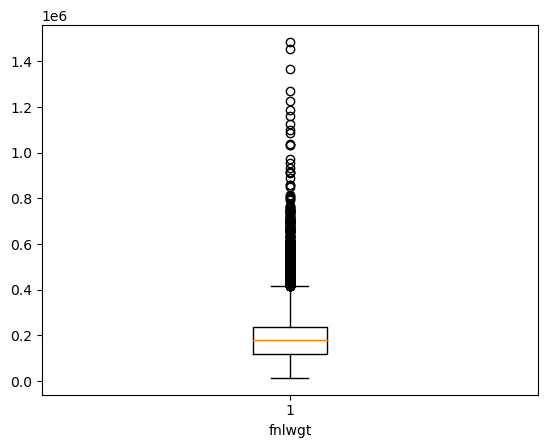

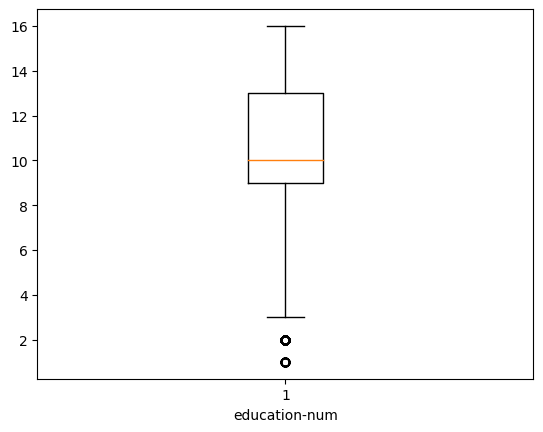

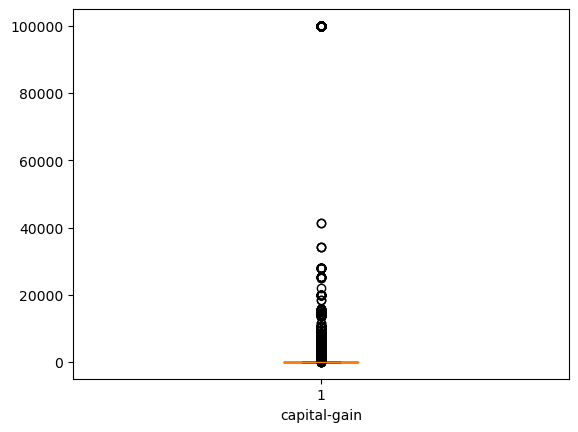

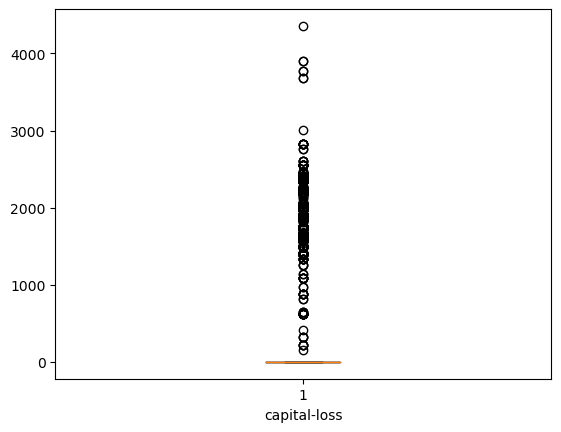

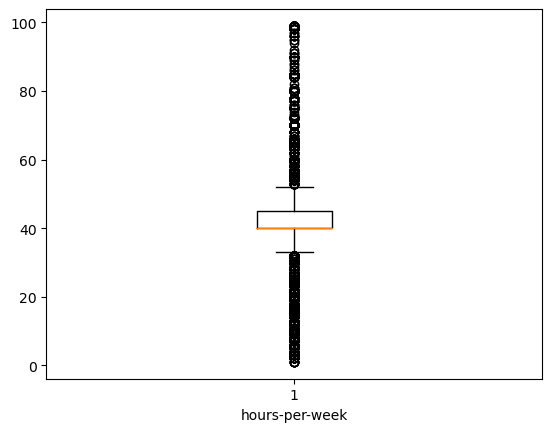

In [43]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [44]:
df['capital-loss'].value_counts()

0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64

In [45]:
df['education-num'].value_counts()

9     9834
10    6669
13    5042
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: education-num, dtype: int64

In [46]:
out_col = ["age","fnlwgt","education-num","hours-per-week"]

In [48]:
for col in out_col:
    Q1 =df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 *IQR #lower whisker
    UW = Q3 + 1.5 *IQR
    df = df[(df[col]>=LW) & (df[col]<=UW)]

In [49]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


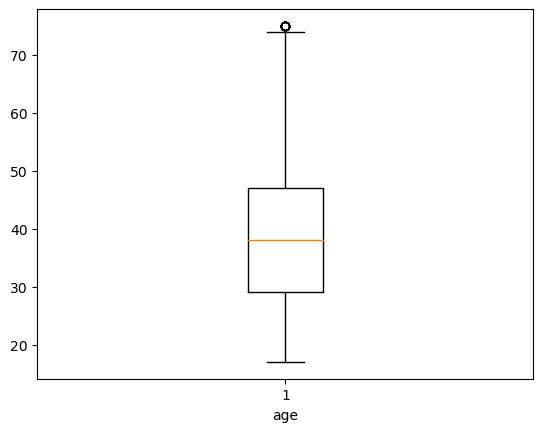

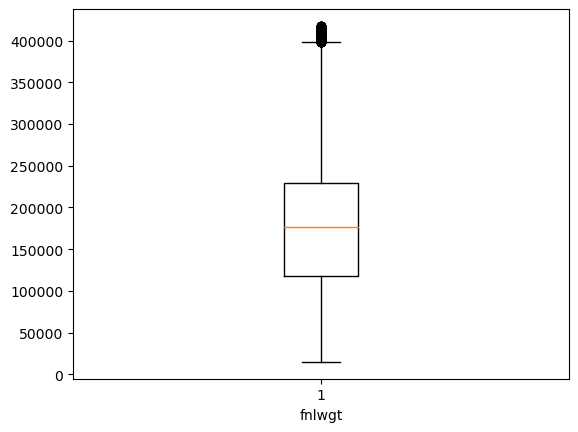

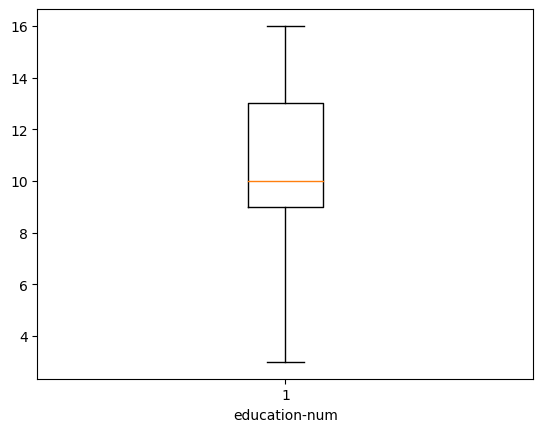

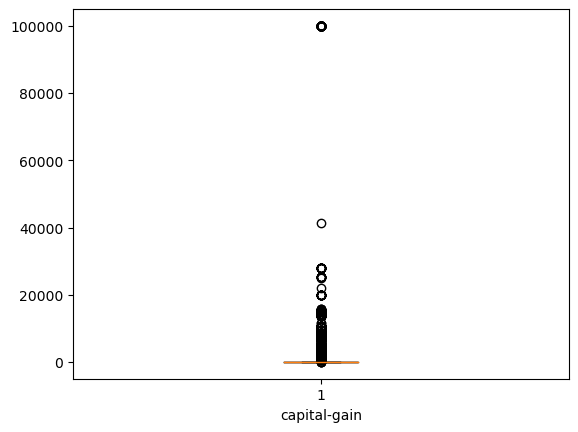

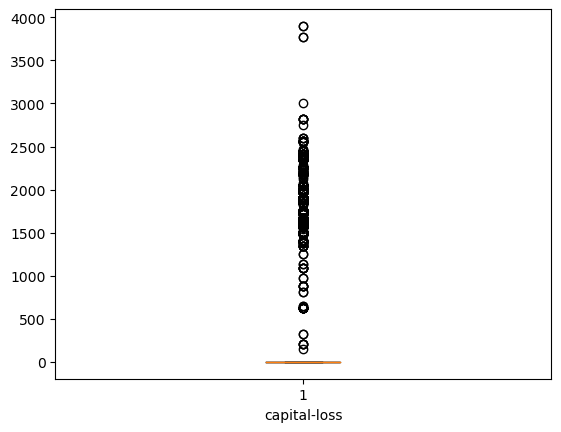

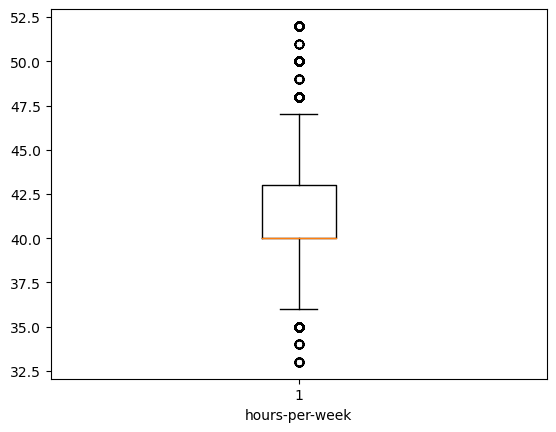

In [50]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [51]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [55]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


In [56]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.057171,-0.068164,-0.021440,0.027387,-0.278928,0.003000,-0.203287,0.016766,0.063407,0.085746,0.058164,0.049109,0.004306,0.253098
workclass,0.057171,1.000000,-0.023297,0.005656,0.029408,-0.022645,0.021168,-0.050834,0.043391,0.058314,0.035813,0.003253,0.057127,0.006067,0.008653
fnlwgt,-0.068164,-0.023297,1.000000,-0.020228,-0.030580,0.031711,0.003778,0.003878,-0.007727,0.020208,-0.003939,-0.003618,-0.012271,-0.063895,-0.001092
education,-0.021440,0.005656,-0.020228,1.000000,0.309789,-0.022679,-0.037943,0.011378,0.012932,-0.037181,0.023357,0.012790,0.036194,0.082719,0.067092
education-num,0.027387,0.029408,-0.030580,0.309789,1.000000,-0.020028,0.111304,-0.065103,0.028083,-0.016960,0.107220,0.074143,0.141268,0.059366,0.326164
marital-status,-0.278928,-0.022645,0.031711,-0.022679,-0.020028,1.000000,0.019403,0.139513,-0.076194,-0.080154,-0.033362,-0.028845,-0.081504,-0.026312,-0.163774
occupation,0.003000,0.021168,0.003778,-0.037943,0.111304,0.019403,1.000000,-0.072564,0.002006,0.083023,0.018578,0.019443,0.063933,-0.005582,0.066273
relationship,-0.203287,-0.050834,0.003878,0.011378,-0.065103,0.139513,-0.072564,1.000000,-0.124942,-0.593404,-0.045761,-0.064497,-0.178937,-0.015744,-0.236607
race,0.016766,0.043391,-0.007727,0.012932,0.028083,-0.076194,0.002006,-0.124942,1.000000,0.101900,0.014266,0.023388,0.094108,0.137338,0.073942
sex,0.063407,0.058314,0.020208,-0.037181,-0.016960,-0.080154,0.083023,-0.593404,0.101900,1.000000,0.038296,0.050743,0.179338,0.006012,0.210961


<Axes: >

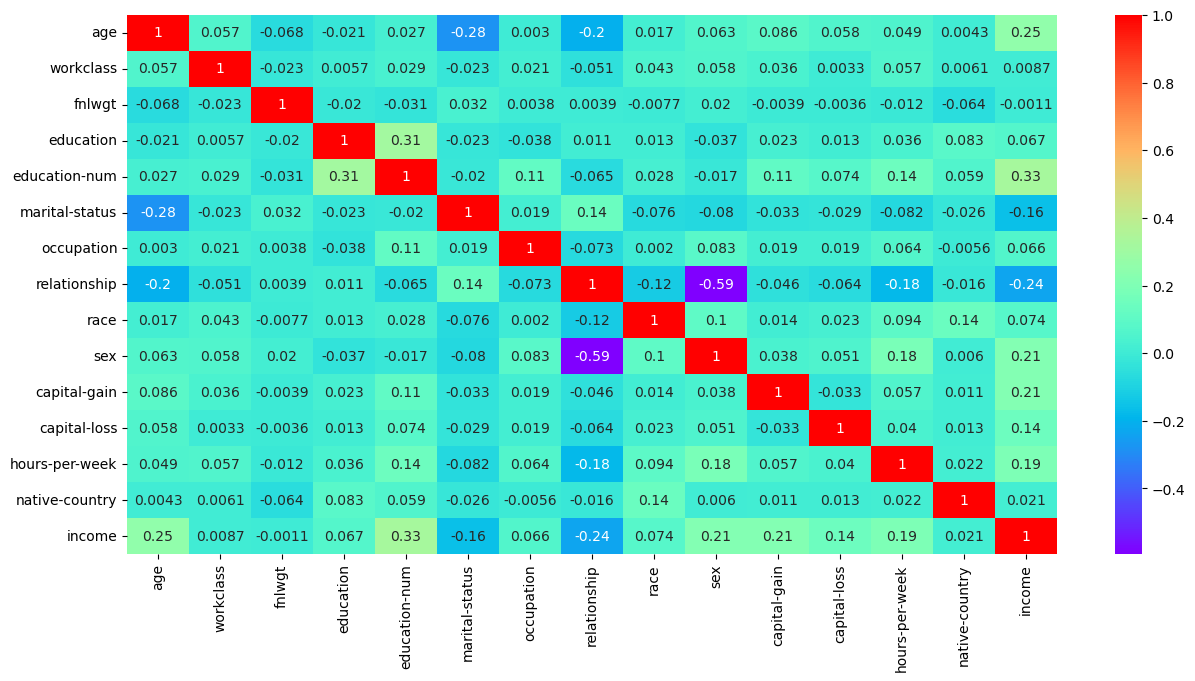

In [132]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot = True,cmap="rainbow")

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age  12.044357
1        workclass   6.165334
2           fnlwgt   5.156834
3        education  10.613509
4    education-num  21.409792
5   marital-status   3.923992
6       occupation   3.073111
7     relationship   2.596909
8             race  19.753027
9              sex   5.027733
10    capital-gain   1.041915
11    capital-loss   1.063243
12  hours-per-week  62.576105
13  native-country  33.620845


In [138]:
df = df.drop(["hours-per-week"],axis =1)

In [139]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age  10.930475
1        workclass   6.034345
2           fnlwgt   4.999922
3        education  10.500616
4    education-num  19.473926
5   marital-status   3.826628
6       occupation   3.048149
7     relationship   2.516665
8             race  18.118613
9              sex   4.709615
10    capital-gain   1.041417
11    capital-loss   1.063149
12  native-country  28.860632


In [140]:
df = df.drop(["native-country"],axis =1)

In [141]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age  10.099023
1        workclass   5.970809
2           fnlwgt   4.960937
3        education  10.199444
4    education-num  18.414953
5   marital-status   3.728532
6       occupation   3.040434
7     relationship   2.411903
8             race  15.384891
9              sex   4.586549
10    capital-gain   1.040168
11    capital-loss   1.063012


In [142]:
df = df.drop(["education-num"],axis =1)

In [143]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0              age   9.518317
1        workclass   5.901171
2           fnlwgt   4.921335
3        education   8.233870
4   marital-status   3.655425
5       occupation   2.939325
6     relationship   2.399189
7             race  14.399405
8              sex   4.573511
9     capital-gain   1.033314
10    capital-loss   1.058552


In [144]:
df = df.drop(["race"],axis =1)

In [145]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0             age  8.222586
1       workclass  5.684218
2          fnlwgt  4.765192
3       education  7.589170
4  marital-status  3.565859
5      occupation  2.909466
6    relationship  2.338058
7             sex  4.301414
8    capital-gain  1.033058
9    capital-loss  1.058360


In [146]:
df = df.drop(["age"],axis =1)

In [147]:
col_list = []
for col in df.columns:
    if ((df[col].dtype !="object") & (col!="income")):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0       workclass  5.171979
1          fnlwgt  4.586520
2       education  6.592310
3  marital-status  3.561742
4      occupation  2.841485
5    relationship  2.318466
6             sex  4.093514
7    capital-gain  1.028775
8    capital-loss  1.054411


In [136]:
col_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [ ]:
X = df[col_list]


# Model building

In [61]:
#splitting the data into independent and dependent feature

In [62]:
x = df.iloc[:,:-1]

In [63]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [64]:
y = df["income"]

In [65]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: income, Length: 21317, dtype: int32

In [66]:
#splitting the data into train and test data

In [67]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 0)

In [85]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
13764,22,2,187052,10,9,4,0,3,4,0,0,0,40,38
30299,42,2,152676,4,4,0,2,4,4,1,0,0,40,32
13433,47,4,160131,13,10,0,2,1,4,1,0,0,40,38
1537,43,2,75742,10,9,2,6,0,4,1,0,0,40,38
4389,32,3,46807,10,9,2,2,0,4,1,99999,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,53,2,254285,11,14,2,9,0,4,1,0,0,40,38
26337,45,1,334039,13,10,2,3,0,4,1,0,0,40,38
7994,37,2,178136,10,9,2,6,0,2,1,0,0,40,38
18504,32,5,200469,13,10,4,10,4,2,0,3887,0,40,38


In [86]:
y_train

13764    0
30299    0
13433    0
1537     0
4389     1
        ..
16700    1
26337    1
7994     0
18504    0
355      1
Name: income, Length: 17053, dtype: int32

In [87]:
x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
8950,27,2,216481,8,13,4,9,1,4,0,0,0,40,38
3921,29,2,183627,1,7,0,2,1,4,1,0,0,40,38
26836,39,2,136081,10,9,2,6,0,4,1,0,2051,40,38
27264,26,2,77661,8,13,4,9,1,4,0,0,0,40,38
28534,26,1,192213,11,14,4,9,1,4,0,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,40,2,67852,10,9,0,13,1,4,1,0,0,35,38
6502,33,2,213226,10,9,0,11,1,4,1,0,0,50,38
9189,25,2,321205,8,13,4,3,1,4,1,4101,0,35,38
10568,39,1,177728,11,14,0,9,1,4,0,0,0,40,38


In [88]:
y_test

8950     0
3921     0
26836    0
27264    0
28534    0
        ..
32171    0
6502     0
9189     0
10568    0
20756    0
Name: income, Length: 4264, dtype: int32

# Logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
#empty model
Log_model = LogisticRegression()

In [92]:
#training the model

In [94]:
Log_model.fit(x_train,y_train)

LogisticRegression()

In [95]:
#testing the model

In [96]:
log_pred = Log_model.predict(x_test)

In [97]:
log_pred

array([0, 0, 1, ..., 0, 0, 1])

In [98]:
y_test

8950     0
3921     0
26836    0
27264    0
28534    0
        ..
32171    0
6502     0
9189     0
10568    0
20756    0
Name: income, Length: 4264, dtype: int32

In [100]:
#Accuracy score

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [103]:
l_acc = accuracy_score(y_test,log_pred)

In [104]:
l_acc

0.7816604127579737

In [106]:
L_cm = confusion_matrix(y_test,log_pred)
L_cm

array([[3022,  156],
       [ 775,  311]], dtype=int64)

In [107]:
(3022+311)/(3022+156+775+311)

0.7816604127579737

Logistic regression - 78%

# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dt_model = DecisionTreeClassifier()

In [119]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
dt_pred = dt_model.predict(x_test)

In [121]:
dt_pred

array([0, 0, 0, ..., 0, 0, 1])

In [122]:
y_test

8950     0
3921     0
26836    0
27264    0
28534    0
        ..
32171    0
6502     0
9189     0
10568    0
20756    0
Name: income, Length: 4264, dtype: int32

In [123]:
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.7936210131332082

In [124]:
dt_cm = confusion_matrix(dt_pred, y_test)
dt_cm

array([[2705,  407],
       [ 473,  679]], dtype=int64)

In [125]:
(2705+679)/(2705+679+407+473)

0.7936210131332082

Decision tree model ---> 79%

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_model = RandomForestClassifier()

In [128]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [129]:
rf_pred = rf_model.predict(x_test)

In [130]:
rf_acc = accuracy_score(rf_pred, y_test)
rf_acc

0.8461538461538461

In [131]:
rf_cm = confusion_matrix(rf_pred, y_test)
rf_cm

array([[2919,  397],
       [ 259,  689]], dtype=int64)

Random forest we are getting the 84% accuracy -->best model 